In [1]:
!pip install tqdm
%matplotlib inline
import math
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from sklearn.datasets.samples_generator import make_moons
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from tqdm import tqdm

np.random.seed(0)

In [36]:
%run -i lib/functions
%run -i lib/infrastructure

<Figure size 432x288 with 0 Axes>

In [37]:
net = NeuralNet(2, 2)

input_layer = InputLayer(input_size=2)
first_layer = Layer(HyperbolicTangent, out_size=2)
second_layer = Layer(ReLU, out_size=2)
out_layer = OutputLayer(SoftMax, 2, CrossEntropy)

input_to_first_connection = Connection(input_layer, 2, 2)
first_layer.add_connection(input_to_first_connection)

first_to_second_connection = Connection(first_layer, 2, 2)
second_layer.add_connection(first_to_second_connection)

second_to_third_connection = Connection(second_layer, 2, 2)
input_to_third_connection = Connection(input_layer, 2, 2)
out_layer.add_connection(second_to_third_connection)
out_layer.add_connection(input_to_third_connection)


net.add_layer(input_layer)
net.add_layer(first_layer)
net.add_layer(second_layer)
net.add_layer(out_layer)

[ 0.16579966 -0.05146151]


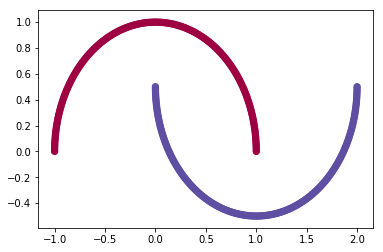

In [38]:

# DATA FOR CLASSIFICATION
# X, y = make_blobs(n_samples=400, centers=2, n_features=2, cluster_std=0.1,random_state=0)
X, y = make_moons(n_samples=400, shuffle=True, noise=None,random_state=0)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

reshaped_y = np.array(y).reshape(len(y),1)

enc = OneHotEncoder()
enc.fit(reshaped_y)
encoded_y = enc.transform(reshaped_y).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, test_size=0.33, random_state=42)
# --------------------------
print(X_train[0])

In [43]:
errors = net.train(X_train, y_train, 1000, 0.01, minibatch_size=50)

Epoch: 0; Error: 4.808920289919652;
Epoch: 1; Error: 4.8042552645128875;
Epoch: 2; Error: 4.799503737492672;
Epoch: 3; Error: 4.795120583699194;
Epoch: 4; Error: 4.791049499221827;
Epoch: 5; Error: 4.787515162431908;
Epoch: 6; Error: 4.783299038682118;
Epoch: 7; Error: 4.779333399540657;
Epoch: 8; Error: 4.777157042630318;
Epoch: 9; Error: 4.791537338563959;
Epoch: 10; Error: 4.786738798933524;
Epoch: 11; Error: 4.782063932019109;
Epoch: 12; Error: 4.777283921733184;
Epoch: 13; Error: 4.772891028406338;
Epoch: 14; Error: 4.768802912594987;
Epoch: 15; Error: 4.764963588813671;
Epoch: 16; Error: 4.7607462703714765;
Epoch: 17; Error: 4.756807081409908;
Epoch: 18; Error: 4.753628979151692;
Epoch: 19; Error: 4.769085741460588;
Epoch: 20; Error: 4.764322842036179;
Epoch: 21; Error: 4.759650660171675;
Epoch: 22; Error: 4.754896567070936;
Epoch: 23; Error: 4.750527620081326;
Epoch: 24; Error: 4.746456069607483;
Epoch: 25; Error: 4.742623384168915;
Epoch: 26; Error: 4.738425382436395;
Epoch: 27

Epoch: 218; Error: 4.3392644154431785;
Epoch: 219; Error: 4.354277086782933;
Epoch: 220; Error: 4.349648381303738;
Epoch: 221; Error: 4.3454619837781765;
Epoch: 222; Error: 4.341623951007629;
Epoch: 223; Error: 4.337354899167661;
Epoch: 224; Error: 4.333365816609398;
Epoch: 225; Error: 4.3296883589167425;
Epoch: 226; Error: 4.326416872426748;
Epoch: 227; Error: 4.323321049077499;
Epoch: 228; Error: 4.319710345661774;
Epoch: 229; Error: 4.330846411252652;
Epoch: 230; Error: 4.332858326568976;
Epoch: 231; Error: 4.328380959497831;
Epoch: 232; Error: 4.324303056115852;
Epoch: 233; Error: 4.320534913338539;
Epoch: 234; Error: 4.3162488277407;
Epoch: 235; Error: 4.312341518631297;
Epoch: 236; Error: 4.3087316187277676;
Epoch: 237; Error: 4.305358686372104;
Epoch: 238; Error: 4.302184972579869;
Epoch: 239; Error: 4.298520344669456;
Epoch: 240; Error: 4.314536865939218;
Epoch: 241; Error: 4.309990835228559;
Epoch: 242; Error: 4.305879866194733;
Epoch: 243; Error: 4.302105194190819;
Epoch: 244

Epoch: 433; Error: 3.9658869527475193;
Epoch: 434; Error: 3.9628259760580598;
Epoch: 435; Error: 3.9592528045486537;
Epoch: 436; Error: 3.9560270554168557;
Epoch: 437; Error: 3.9530914560539823;
Epoch: 438; Error: 3.9693815621039086;
Epoch: 439; Error: 3.9671746017311826;
Epoch: 440; Error: 3.963480349955491;
Epoch: 441; Error: 3.959181406669347;
Epoch: 442; Error: 3.955355277570831;
Epoch: 443; Error: 3.951882601985668;
Epoch: 444; Error: 3.9486698154490094;
Epoch: 445; Error: 3.9456611156476202;
Epoch: 446; Error: 3.942025638061666;
Epoch: 447; Error: 3.9388388324929196;
Epoch: 448; Error: 3.9358598816475348;
Epoch: 449; Error: 3.9465249132872304;
Epoch: 450; Error: 3.949791433602043;
Epoch: 451; Error: 3.9461011735771248;
Epoch: 452; Error: 3.941791041861298;
Epoch: 453; Error: 3.9379586629114316;
Epoch: 454; Error: 3.934472302054414;
Epoch: 455; Error: 3.931263824930457;
Epoch: 456; Error: 3.928263680385646;
Epoch: 457; Error: 3.9246243192445345;
Epoch: 458; Error: 3.92161689170483

Epoch: 645; Error: 3.6421426340265137;
Epoch: 646; Error: 3.638757724874493;
Epoch: 647; Error: 3.6497586931158974;
Epoch: 648; Error: 3.653637249393327;
Epoch: 649; Error: 3.6497691989340653;
Epoch: 650; Error: 3.6463423551019636;
Epoch: 651; Error: 3.643227767080402;
Epoch: 652; Error: 3.6403346680005346;
Epoch: 653; Error: 3.6366789335917513;
Epoch: 654; Error: 3.633414475211578;
Epoch: 655; Error: 3.6301652164424603;
Epoch: 656; Error: 3.6264646498677617;
Epoch: 657; Error: 3.623174050792459;
Epoch: 658; Error: 3.638596984418265;
Epoch: 659; Error: 3.637756147086586;
Epoch: 660; Error: 3.634047358536426;
Epoch: 661; Error: 3.630739562668344;
Epoch: 662; Error: 3.627715595460675;
Epoch: 663; Error: 3.6241211042135646;
Epoch: 664; Error: 3.620682041874228;
Epoch: 665; Error: 3.6175261797267;
Epoch: 666; Error: 3.61364196843395;
Epoch: 667; Error: 3.6102180983586276;
Epoch: 668; Error: 3.6145045640178015;
Epoch: 669; Error: 3.624941426968925;
Epoch: 670; Error: 3.6211033494298164;
Epo

Epoch: 857; Error: 3.3676185510774657;
Epoch: 858; Error: 3.3634283343640106;
Epoch: 859; Error: 3.365658036870733;
Epoch: 860; Error: 3.379378730279775;
Epoch: 861; Error: 3.3761871732672684;
Epoch: 862; Error: 3.3733001844335786;
Epoch: 863; Error: 3.369639628566172;
Epoch: 864; Error: 3.3662751738194614;
Epoch: 865; Error: 3.3631135957809994;
Epoch: 866; Error: 3.3592309661285067;
Epoch: 867; Error: 3.3558795039276355;
Epoch: 868; Error: 3.3523620552790967;
Epoch: 869; Error: 3.348629576145015;
Epoch: 870; Error: 3.364652348502933;
Epoch: 871; Error: 3.365691812167058;
Epoch: 872; Error: 3.3625901369914617;
Epoch: 873; Error: 3.3597952237790176;
Epoch: 874; Error: 3.35608827442825;
Epoch: 875; Error: 3.3528116410837114;
Epoch: 876; Error: 3.3496080914276662;
Epoch: 877; Error: 3.3458194327426023;
Epoch: 878; Error: 3.3424786298603424;
Epoch: 879; Error: 3.338325481560367;
Epoch: 880; Error: 3.3381722893427144;
Epoch: 881; Error: 3.354325414168774;
Epoch: 882; Error: 3.35116063087674

In [44]:
prediction = net.predict(X_test).T
correct = 0

for i in range(len(X_test)):
    pred = np.argmax(prediction[i])
    target = np.argmax(y_test[i])
    if pred == target:
        correct += 1
print("{0}/{1}".format(correct, len(X_test)))

132/132
